$\#\#\#\#\#\#\#$ Libraries $\#\#\#\#\#\#\#$

In [774]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time

import pymongo 

$\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#$

## DATA

I will be using the database [Bicycle Store Dataset](https://www.kaggle.com/datasets/rohitsahoo/bicycle-store-dataset?select=Customer+Address.csv) which are 4 tables in format csv, we will converted it to NoSQL in the exercise 1.


# Nivell 1

## Exercici 1: Crea una base de dades NoSQL utilitzant MongoDB. Afegeix-li algunes dades d'exemple que et permetin comprovar que ets capaç de processar-ne la informació de manera bàsica.


To create the database we will follow the tutorial of [W3Schools - MongoDB with javascript](https://www.w3schools.com/nodejs/nodejs_mongodb_create_db.asp), but first we will convert the csv tables into json to load it into the mongo.

Sample of the first customer in our Customer collection in json:

```json
[
  {
    "customer_id": 1,
    "first_name": "Chickie",
    "last_name": "Brister",
    "gender": "Male",
    "past_3_years_bike_related_purchases": 86,
    "DOB": "12-07-1957",
    "job_title": "General Manager",
    "job_industry_category": "Manufacturing",
    "wealth_segment": "Mass Customer",
    "deceased_indicator": "N",
    "owns_car": "Yes",
    "tenure": 14,
    "address": "45 Shopko Center",
    "postcode": 4500,
    "state": "QLD",
    "country": "Australia",
    "property_valuation": 6
  }
]

```

We use the command: db.collection.insert() the costumer table in json. Also, we may notice that in NoSQL the tables are called collections, thus the code if we wanted insert only this collection would be:

```json
    BikeStores.Customer.insert(customer.json)
```

Also, we may have our Customer collection in different documents, for this the command we might use is:

```json
    db.collection.insertMany([doc1, doc2,etc])
```

Since our collections are only in one document we choose the first form to fill the database.

To navigate through our database we use:

```json
    > use BikeStores

    > show collections 

```
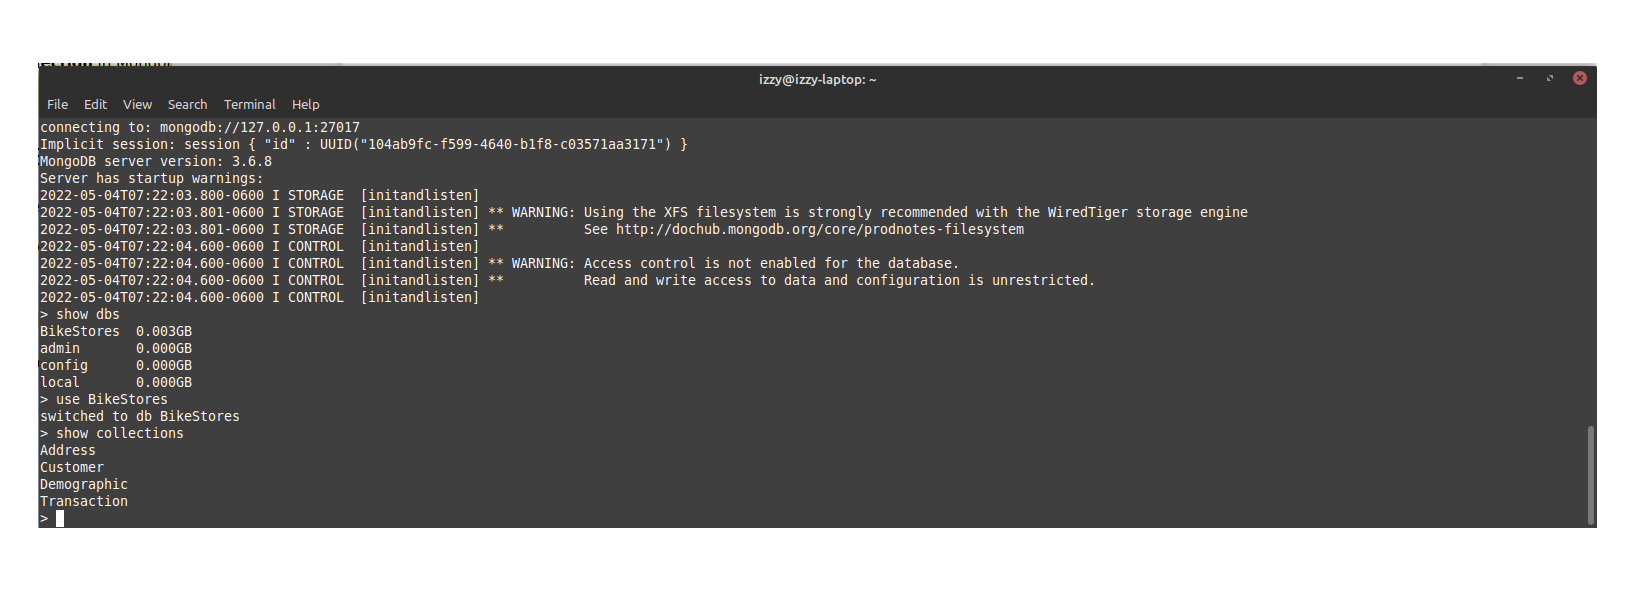


## Exercici 2: Connecta la base de dades NoSQL a Python utilitzant per exemple pymongo.


Now let's connect the database to python, using the library pymongo and extract the collections.

In [775]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")

mydb = myclient["mydatabase"]

In [776]:
# checking that the database is in Mongodb
dblist = myclient.list_database_names()
print(dblist)

if 'BikeStores' in dblist:
    print('The database exists.')
else:
    print('The database not exists.')

['BikeStores', 'admin', 'config', 'local']
The database exists.


In [777]:
# checking the tables (collections)
mydb = myclient['BikeStores']

collist = mydb.list_collection_names()
print(collist)

if 'Customer' in collist:
    print('The collection exists.')
else:
    print('The collection not exists.')

['Address', 'Demography', 'Customer', 'Transaction']
The collection exists.


In [778]:
# take a look inside the collection:
mycol = mydb['Customer']
# let's limit the output since these collections are quite large:
myresult = mycol.find({},{ "_id": 0, "first_name" : 1, "last_name" : 1, "gender" : 1 }).limit(10)

for x in myresult:
    print(x)

{'first_name': 'Chickie', 'last_name': 'Brister', 'gender': 'Male'}
{'first_name': 'Morly', 'last_name': 'Genery', 'gender': 'Male'}
{'first_name': 'Ardelis', 'last_name': 'Forrester', 'gender': 'Female'}
{'first_name': 'Lucine', 'last_name': 'Stutt', 'gender': 'Female'}
{'first_name': 'Melinda', 'last_name': 'Hadlee', 'gender': 'Female'}
{'first_name': 'Druci', 'last_name': 'Brandli', 'gender': 'Female'}
{'first_name': 'Rutledge', 'last_name': 'Hallt', 'gender': 'Male'}
{'first_name': 'Nancie', 'last_name': 'Vian', 'gender': 'Female'}
{'first_name': 'Duff', 'last_name': 'Karlowicz', 'gender': 'Male'}
{'first_name': 'Barthel', 'last_name': 'Docket', 'gender': 'Male'}


So, with that option we can load on a variable our full dataset, or only the parts we are interest on.

Now, let's extract all data and all columns.

In [779]:
# now let's extract and save the four collections that are on our dataset.
def select_collection(name):
    mycol = mydb[name]
    table1 = mycol.find()
    
    return table1


df_Add = pd.DataFrame(select_collection("Address"))
df_Cust = pd.DataFrame(select_collection("Customer"))
df_Demo = pd.DataFrame(select_collection("Demography"))
df_Trans = pd.DataFrame(select_collection("Transaction"))

As a side note, if we wanted to add a new collection to our database we could use the following code:

In [780]:
# If we wanted to add a new collection: example stores.
# This data belongs to a prior database which I was playing with, but when I was making the json I realized that the
# different collections were missing important columns (the ones which refer to customers and such, and I discarded
# it)
#
#
#newcol = mydb['stores']
#
#liststores = [
#    {'_id' : 1,'store_name' : 'Santa Cruz Bikes', 'phone' : '(831) 476-4321', 'email' : 'santacruz@bikes.shop', 
#     'address' : '3700 Portola Drive', 'city' : 'Santa Cruz', 'state' : 'CA', 'postal_code' : '95060'},
#    {'_id' : 2, 'store_name' : 'Baldwin Bikes', 'phone' : '(516) 379-8888', 'email' : 'baldwin@bikes.shop', 
#     'address' : '4200 Chestnut Lane', 'city' : 'Baldwin', 'state' : 'NY', 'postal_code' : '11432'},
#    {'_id' : 3, 'store_name' : 'Rowlett Bikes', 'phone' : '(972) 530-5555', 'email' : 'rowlett@bikes.shop', 
#     'address' : '8000 Fairway Avenue', 'city' : 'Rowlett', 'state' : 'TX', 'postal_code' : '75088'}
#]
#
#x = newcol.insert_many(liststores)
#
# show inserted ids:
#print('IDs of the list:\n', x.inserted_ids)
# show how many stores are inside:
#print('Number of stores in the collection:', x.count())

# Nivell 2

## Exercici 1: Carrega algunes consultes senzilles a un Pandas Dataframe. 

Now that we have loaded the database in different datasets, we need to merge them to analyse it.

First, we drop the id column since it is a hash that has been generated when the collection was loaded into the database.

In [781]:
df_Add.drop('_id', axis=1, inplace = True)
df_Cust.drop('_id', axis=1, inplace = True)
df_Demo.drop('_id', axis=1, inplace = True)
df_Trans.drop('_id', axis=1, inplace = True)

Before merging, let's take a peak to one of them to see if we can merge them by customer_id.

In [782]:
print('Dimensions of Address:', df_Add.shape)
print('columns:\n', df_Add.columns)
print('\n')
print('Dimensions of Customer:', df_Cust.shape)
print('columns:\n', df_Cust.columns)
print('\n')
print('Dimensions of Demography:', df_Demo.shape)
print('columns:\n', df_Demo.columns)
print('\n')
print('Dimensions of Transaction:', df_Trans.shape)
print('columns:\n', df_Trans.columns)
print('\n')

Dimensions of Address: (3999, 6)
columns:
 Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')


Dimensions of Customer: (1000, 17)
columns:
 Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')


Dimensions of Demography: (4000, 12)
columns:
 Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')


Dimensions of Transaction: (20000, 12)
columns:
 Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', '

It seems that database needs more work before we proceed to do the merging, and the only point in which we can merge them it is by 'customer_id', since it is the one column all they have in common. Also, it looks like the information of datasets Customer is a merged dataset of Address and Demography. In first glance we can drop enterly the Customer dataset, but before doing so we make sure that all the customers in Customer dataset are included in the Demography and Address ones.

First we check Customer and Demography, by comparing the columns 'first_name', 'last_name', 'gender', and 'DOB' (date of birth), these ones even might be repeated, ie. date of birth or first name, the four together of them has more probability to be unique.

In [783]:
tmp1 = df_Cust[['first_name', 'last_name', 'gender', 'DOB', 'job_title']]
tmp2 = df_Demo[['first_name', 'last_name', 'gender', 'DOB', 'job_title']]

# the easiest way is to use the inner join the output is the intersecction between the tmp1 and tmp2
pd.merge(tmp1, tmp2, on=['first_name', 'last_name'], how='inner')

,first_name,last_name,gender_x,DOB_x,job_title_x,gender_y,DOB_y,job_title_y
0,Glyn,NaN,Male,13-02-1945,General Manager,Male,1966-07-03,Software Test Engineer III


There is only one entry that is equal, and even if they share first name, we can see that they surmane might be different since they have different date of birth and different job title.

In [784]:
tmp3 = df_Cust[['address', 'postcode', 'state', 'country']]
tmp4 = df_Add[['address', 'postcode', 'state', 'country']]

tmp5 = pd.merge(tmp3, tmp4, on=['address', 'postcode'], how='inner')
print(tmp5)
# check which customers they are on the df_Add dataset:, since they are only 3 we do without loop.
a = df_Add[df_Add.address == tmp5.loc[0, 'address']].reset_index()
b = df_Add[df_Add.address == tmp5.loc[1, 'address']].reset_index()
c = df_Add[df_Add.address == tmp5.loc[2, 'address']].reset_index()
print('\n')
# now we search them to the df_Demo dataset:
print('customer ', df_Add.loc[0,'customer_id'], 'it is in demography? ', 
      df_Demo[df_Demo['customer_id'] == a.loc[0,'customer_id']])

print('\n')

print('customer ', df_Add.loc[1,'customer_id'], 'it is in demography? ', 
      df_Demo[df_Demo['customer_id'] == b.loc[0,'customer_id']])

print('\n')

print('customer ', df_Add.loc[2,'customer_id'], 'it is in demography? ', 
      df_Demo[df_Demo['customer_id'] == c.loc[0,'customer_id']])

print('\n')

# and we also take a look into the transaction dataset:
print('customer ', df_Add.loc[0,'customer_id'], 'it is in demography? ', 
      df_Trans[df_Trans['customer_id'] == a.loc[0,'customer_id']])

print('\n')

print('customer ', df_Add.loc[1,'customer_id'], 'it is in demography? ', 
      df_Trans[df_Trans['customer_id'] == b.loc[0,'customer_id']])

print('\n')

print('customer ', df_Add.loc[2,'customer_id'], 'it is in demography? ', 
      df_Trans[df_Trans['customer_id'] == c.loc[0,'customer_id']])

print('\n')


                  address  postcode state_x  country_x state_y  country_y
0        8194 Lien Street      4032     QLD  Australia     QLD  Australia
1  87 Crescent Oaks Alley      2756     NSW  Australia     NSW  Australia
2         320 Acker Drive      2251     NSW  Australia     NSW  Australia


customer  1 it is in demography?  Empty DataFrame
Columns: [customer_id, first_name, last_name, gender, past_3_years_bike_related_purchases, DOB, job_title, job_industry_category, wealth_segment, deceased_indicator, owns_car, tenure]
Index: []


customer  2 it is in demography?  Empty DataFrame
Columns: [customer_id, first_name, last_name, gender, past_3_years_bike_related_purchases, DOB, job_title, job_industry_category, wealth_segment, deceased_indicator, owns_car, tenure]
Index: []


customer  4 it is in demography?  Empty DataFrame
Columns: [customer_id, first_name, last_name, gender, past_3_years_bike_related_purchases, DOB, job_title, job_industry_category, wealth_segment, deceased_indic

We can see that there are 3 addresses that coincide, but they ids are not stored into the demography neither to the transaction.

At first glance, we can see that we may have to not use the customer dataset since by the looks seems to be an altogether different dataset not related to the transactions dataset we want to analyse. To make sure, we take a peak to the transactions, see if there is any customer_ids that are not in demographics and thus reshape the customer_id from the customer dataset.

In [785]:
df_Trans.nunique()

transaction_id      20000
product_id            101
customer_id          3494
transaction_date      364
online_order            2
order_status            2
brand                   6
product_line            4
product_class           3
product_size            3
list_price            296
standard_cost         103
dtype: int64

There are only 3494 customer transactions, first, we compare it with the largest dataset: demography, since we have 4000 entries.

In [786]:
print('Num of transactions with equal costumer id in demographics', 
      pd.merge(df_Demo, df_Trans, on = ['customer_id'], how='inner').shape[0])
print('\n')
print('Unique values on merge\n', pd.merge(df_Demo, df_Trans, on = ['customer_id'], how='inner').nunique())

Num of transactions with equal costumer id in demographics 19997


Unique values on merge
 customer_id                             3493
first_name                              2839
last_name                               3267
gender                                     6
past_3_years_bike_related_purchases      100
DOB                                     3051
job_title                                195
job_industry_category                     10
wealth_segment                             3
deceased_indicator                         2
owns_car                                   2
tenure                                    22
transaction_id                         19997
product_id                               101
transaction_date                         364
online_order                               2
order_status                               2
brand                                      6
product_line                               4
product_class                              3
product_s

We note that there are 19997 unique transactions over a total of 20000 transactions registered, thus we inspect where 3 transactions have gone. First, we check the number of transactions done, and compare with the addresses.

In [787]:
print('Num of trans with equal costumer id in address', 
      pd.merge(df_Add, df_Trans, on = ['customer_id'], how='inner').shape[0])
print('\n')
print('Unique values on merge\n', pd.merge(df_Add, df_Trans, on = ['customer_id'], how='inner').nunique())

Num of trans with equal costumer id in address 19968


Unique values on merge
 customer_id            3489
address                3487
postcode                835
state                     5
country                   1
property_valuation       12
transaction_id        19968
product_id              101
transaction_date        364
online_order              2
order_status              2
brand                     6
product_line              4
product_class             3
product_size              3
list_price              294
standard_cost           100
dtype: int64


In here we see that, only taking into account customer_id, we have 3493 costumers while 3489 had done transactions with different addresses. Thus 4 customers had not perform a transaction. Check which ones had not done it:

In [788]:
# we will do the checking of which ones had not performed transaction with a dummy column.
tmp1 = pd.merge(df_Demo, df_Trans, on = ['customer_id'], how='inner')
tmp2 = pd.merge(df_Add, df_Trans, on = ['customer_id'], how='inner')

tmp2['key'] = 'x'
temp_df = pd.merge(tmp1, tmp2, on='customer_id', how='left')
tmp3 = temp_df[temp_df.key.isnull()]
print('ids: ', tmp3['customer_id'].unique())
print('name: ', tmp3['first_name'].unique())
print('surname: ',tmp3['last_name'].unique())
#tmp3.columns
print('order status', tmp3['order_status_y'].unique())

ids:  [ 3 10 22 23]
name:  ['Arlin' 'Fiorenze' 'Deeanne' 'Olav']
surname:  ['Dearle' 'Birdall' 'Durtnell' 'Polak']
order status [nan]


Looks like these 4 people had not finish the order, thus there was no transaction done, we can take note that we can delete these rows when we do the analysis in exercise 3.

In [789]:
# check if these three costumers are on the dataset demography or in the customer dataset: 

a = df_Demo.loc[df_Demo['customer_id'] == 3]
b = df_Cust.loc[df_Cust['first_name'] == 'Dearle']
print('Customer 3 is in demography? ', a['customer_id'].value_counts())
print('Customer 3 is in customer? ', b['first_name'].value_counts())
print('\n')

a = df_Demo.loc[df_Demo['customer_id'] == 10]
b = df_Cust.loc[df_Cust['first_name'] == 'Birdall']
print('Customer 10 is in demography? ', a['customer_id'].value_counts())
print('Customer 10 is in customer? ', b['first_name'].value_counts())
print('\n')

a = df_Demo.loc[df_Demo['customer_id'] == 22]
b = df_Cust.loc[df_Cust['first_name'] == 'Durtnell']
print('Customer 22 is in demography? ',  a['customer_id'].value_counts())
print('Customer 22 is in customer? ',  b['first_name'].value_counts())
print('\n')

a = df_Demo.loc[df_Demo['customer_id'] == 23]
b = df_Cust.loc[df_Cust['first_name'] == 'Polak']
print('Customer 23 is in demography? ',  a['customer_id'].value_counts())
print('Customer 23 is in customer? ',  b['first_name'].value_counts())

Customer 3 is in demography?  3    1
Name: customer_id, dtype: int64
Customer 3 is in customer?  Series([], Name: first_name, dtype: int64)


Customer 10 is in demography?  10    1
Name: customer_id, dtype: int64
Customer 10 is in customer?  Series([], Name: first_name, dtype: int64)


Customer 22 is in demography?  22    1
Name: customer_id, dtype: int64
Customer 22 is in customer?  Series([], Name: first_name, dtype: int64)


Customer 23 is in demography?  23    1
Name: customer_id, dtype: int64
Customer 23 is in customer?  Series([], Name: first_name, dtype: int64)


So, they all belong to demography but not customer dataset, as we exepted, since demography and transaction are linked, but customer is an independent set.

So, we have prove that three out of the four datasets are the same system, while the dataset Customer is from a different system. Now, we merge the three of the datasets: Demography, Transaction, and, Address. Using the variable 'customer_id'.

In [790]:
# to make sure we have all not only intersection. since df_demo is larger than df_add
df12 = pd.merge(df_Add, df_Demo, on='customer_id', how='right') 
df12

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0,Eli,Bockman,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,NaN,NaN,NaN,NaN,NaN,Arlin,Dearle,Male,61.0,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,0 Holy Cross Court,4211.0,QLD,Australia,9.0,Talbot,NaN,Male,33.0,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0,Sheila-kathryn,Calton,Female,56.0,1977-05-13,Senior Editor,n/a,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,0 Transport Center,3977.0,VIC,Australia,6.0,Rosalia,Halgarth,Female,8.0,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0
3996,3997,4 Dovetail Crossing,2350.0,NSW,Australia,2.0,Blanch,Nisuis,Female,87.0,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0
3997,3998,736 Roxbury Junction,2540.0,NSW,Australia,6.0,Sarene,Woolley,U,60.0,NaN,Assistant Manager,IT,High Net Worth,N,No,NaN
3998,3999,1482 Hauk Trail,3064.0,VIC,Australia,3.0,Patrizius,NaN,Male,11.0,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Yes,10.0


In [791]:
# now we remeber that df_trans is larger than df12
df = pd.merge(df12, df_Trans, on='customer_id', how='right')
print('Full dataset dimensions: ', df.shape)
df.head()

Full dataset dimensions:  (20000, 28)


,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,...,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
0,2950,984 Hoepker Court,3064.0,VIC,Australia,6.0,Kristos,Anthony,Male,19.0,...,2,25-02-2017,FALSE,Approved,Solex,Standard,medium,medium,71.49,$53.62
1,3120,4 Shopko Circle,2196.0,NSW,Australia,5.0,Lauree,O'Donnell,Female,89.0,...,3,21-05-2017,TRUE,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92
2,402,586 Miller Parkway,2835.0,NSW,Australia,1.0,Berne,Donegan,Male,9.0,...,37,16-10-2017,FALSE,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82
3,3135,1617 Harper Parkway,2096.0,NSW,Australia,10.0,Titus,Worsall,Male,83.0,...,88,31-08-2017,FALSE,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10
4,787,0601 Stephen Place,2292.0,NSW,Australia,7.0,Norma,Batrim,Female,29.0,...,78,01-10-2017,TRUE,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48


In [792]:
df1 = df.copy()

In summary, we have notice that our database was more dirty than we assumed, there was information extra that was not needed and not linked into our "main" database, and also that we have notice few discrepancies with the transactions, we will found that there are few transactions not done and also many empty/null fields.

# Nivell 3

## Exercici 1: Genera un resum estadístic de la informació que conté la base de dades.

In this exercise we will make a bit of statidistics of our database. By answering two questions 1) Which type of people buys the bikes in this store? And 2) Which bikes tend to sell more? The answer we found out for the first question it is that the main costumer it either male or female and has from 40 to 50 years old, also has an stable income since works in Finances, manufacturing or health services. For the second question, the bike most sold is Solex Standard middle quality.



Let's clean a bit the database, since we know it is a bit messy:

In [793]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          20000 non-null  int64  
 1   address                              19968 non-null  object 
 2   postcode                             19968 non-null  float64
 3   state                                19968 non-null  object 
 4   country                              19968 non-null  object 
 5   property_valuation                   19968 non-null  float64
 6   first_name                           19997 non-null  object 
 7   last_name                            19355 non-null  object 
 8   gender                               19997 non-null  object 
 9   past_3_years_bike_related_purchases  19997 non-null  float64
 10  DOB                                  19551 non-null  object 
 11  job_title                   

We can see there are variables in float that must be integers (as postcode) and columns not needed for our analysis. First we change the dtypes let's check how many nulls we have in each column, and delete the rows that are uneeded as the 4 costumers that didn't finish the transaction.

List of the variables of the dataset:

- customer_id = number of customer.
- address = address of the customer.
- postcode = postcode of the customer.
- state = state of the customer.
- country = country of the customer.
- property_valuation = value of the property of the customer.
- first_name = name of the customer.
- last_name = surname of the customer.
- gender = gender the customer identifies with.
- past_3_years_bike_related_purchases = number of bike related material sold to the costumer the last 3 years.
- DOB = date of birth.
- job_title = job the customer has.
- job_industry_category = in which sector the customer works.
- wealth_segment = type of customer (buys massively, or not, buys expensives bike, etc.)
- deceased_indicator = if the customer has died.
- owns_car = customer has a car.
- tenure = number of years buying bike related material.
- transaction_id = unique number for each transaction.
- product_id = unique number for each type of bikes.
- transaction_date = date in which the transaction was done.
- online_order = if the transaction was done online or not.
- order_status = if the transaction has been done or the customer has cancelled.
- brand = brand of the bike purchased.
- product_line = type of bike (Standard, mountain, etc.)
- product_class = quality of the bike (medium, large, small).
- product_size = dimensions of the bike (large, medium, small).
- list_price = price in the shop.
- standard_cost = fabrication price.


In [794]:
df.nunique()

customer_id                             3494
address                                 3487
postcode                                 835
state                                      5
country                                    1
property_valuation                        12
first_name                              2839
last_name                               3267
gender                                     6
past_3_years_bike_related_purchases      100
DOB                                     3051
job_title                                195
job_industry_category                     10
wealth_segment                             3
deceased_indicator                         2
owns_car                                   2
tenure                                    22
transaction_id                         20000
product_id                               101
transaction_date                         364
online_order                               2
order_status                               2
brand     

Now let's purge from unnecessary columns to our analysis and change some of the dtypes.

In [795]:
# change date of birth from string to datetime:
df['DOB'] = pd.to_datetime(df['DOB'])

# check how many null values be have:
nulcol = df.isnull().sum()
print('Values that are null:')
print(nulcol[nulcol > 0])

Values that are null:
address                                  32
postcode                                 32
state                                    32
country                                  32
property_valuation                       32
first_name                                3
last_name                               645
gender                                    3
past_3_years_bike_related_purchases       3
DOB                                     449
job_title                              2397
job_industry_category                     3
wealth_segment                            3
deceased_indicator                        3
owns_car                                  3
tenure                                  449
online_order                            360
brand                                   197
product_line                            197
product_class                           197
product_size                            197
standard_cost                           197
dtype: int

Let's begin trying to determine if we can do anything with the null variables. First with gender.

In [796]:
df.gender.unique()

array(['Male', 'Female', 'U', 'F', 'M', 'Femal', nan], dtype=object)

We can change M and F for Male and Female, respectively, and put the nan to U (U we assume it is for gender fluid, since we don't know which gender they identify).

In [797]:
df['gender'] = df['gender'].replace({'F':'Female'})
df['gender'] = df['gender'].replace({'Femal':'Female'})
df['gender'] = df['gender'].replace({'M':'Male'})
df['gender'] = df['gender'].replace({np.nan:'U'})
df.gender.unique()

array(['Male', 'Female', 'U'], dtype=object)

Now let's explore the deceased indicator.

In [798]:
df['deceased_indicator'].unique()

array(['N', 'Y', nan], dtype=object)

In [799]:
# find the values with deceased 
indx = df[df['deceased_indicator'] == 'Y'].index.tolist()
df.loc[indx, ['DOB', 'customer_id', 'first_name', 'last_name']]

,DOB,customer_id,first_name,last_name
561,1970-03-07,753,Josy,St. Quentin
7318,1970-03-07,753,Josy,St. Quentin
8268,1970-03-07,753,Josy,St. Quentin
12094,1970-03-07,753,Josy,St. Quentin
16082,1970-03-07,753,Josy,St. Quentin
18328,1970-03-07,753,Josy,St. Quentin
18828,1970-03-07,753,Josy,St. Quentin
19681,1970-03-07,753,Josy,St. Quentin


This is the only customer deceased in the table.

In [800]:
indx2 = df[df['deceased_indicator'].isna()].index.tolist()
df.loc[indx2, ['customer_id', 'first_name', 'last_name', 'address', 'DOB', 'online_order', 'transaction_date']]

,customer_id,first_name,last_name,address,DOB,online_order,transaction_date
8707,5034,NaN,NaN,NaN,NaT,FALSE,07-10-2017
16700,5034,NaN,NaN,NaN,NaT,FALSE,27-01-2017
17468,5034,NaN,NaN,NaN,NaT,FALSE,03-01-2017


Since this customer has make the order of these three bikes in-store and for the dates, they have high probability to be alive, thus we mark them as alive.

In [801]:
df['deceased_indicator'] = df['deceased_indicator'].replace({np.nan : 'N'})

Now let's see online order. In this part we can also take a look the ones withouts address, we may assume that these customers that didn't give direction they may have purchased in-store, instead.

In [802]:
df['online_order'].unique()

array(['FALSE', 'TRUE', nan], dtype=object)

In [803]:
print('num of variables in the column:', df['online_order'].nunique(dropna=False))
print('there are ', df['online_order'].isna().sum(), 'nan')
indx = df[df['online_order'].isna()].index.tolist()

num of variables in the column: 3
there are  360 nan


First, we explore if there is customers that had ordered online but not given the address, this would mean the store had "pick-up in store service".

In [804]:
indx0 = df[(df['address'].isna()) & (df['online_order'] == 'TRUE')].index.tolist()
df.loc[indx0, ['customer_id', 'online_order', 'wealth_segment']]

,customer_id,online_order,wealth_segment
3503,22,TRUE,Mass Customer
4600,22,TRUE,Mass Customer
5955,10,TRUE,Mass Customer
7694,23,TRUE,High Net Worth
7950,23,TRUE,High Net Worth
10249,10,TRUE,Mass Customer
11783,3,TRUE,Mass Customer
14955,22,TRUE,Mass Customer
15586,23,TRUE,High Net Worth
17001,22,TRUE,Mass Customer


4 customers had purchased online but not given their addresses => there is pick-up in store service, while you can order online. 

Now we explore if people that had not given the address they had brought online or in-store, or are in the nan box.

In [805]:
indx = df[df['online_order'].isna()].index.tolist()
tmp = df.loc[indx, ['customer_id', 'first_name', 'last_name', 'address', 'state', 'online_order', 'order_status', 
                    'transaction_date', 'wealth_segment', 'past_3_years_bike_related_purchases']]
tmp[tmp.address.isna()]

,customer_id,first_name,last_name,address,state,online_order,order_status,transaction_date,wealth_segment,past_3_years_bike_related_purchases
16724,3,Arlin,Dearle,NaN,NaN,NaN,Approved,26-06-2017,Mass Customer,61.0


In [806]:
# number of transactions done by Arlin Dearle (remember this one was one that wer "dummy in last exercise")
indx2 = df[df['customer_id'] == 3].index.tolist()
df.loc[indx2, ['customer_id', 'online_order', 'transaction_date']]

,customer_id,online_order,transaction_date
10301,3,FALSE,23-02-2017
11004,3,FALSE,16-09-2017
11783,3,TRUE,21-04-2017
12953,3,FALSE,05-04-2017
13284,3,FALSE,04-09-2017
15187,3,FALSE,24-03-2017
16724,3,NaN,26-06-2017
19497,3,FALSE,19-09-2017


In [807]:
# explore the online order of Arlin:
df.loc[11783,:]

customer_id                                              3
address                                                NaN
postcode                                               NaN
state                                                  NaN
country                                                NaN
property_valuation                                     NaN
first_name                                           Arlin
last_name                                           Dearle
gender                                                Male
past_3_years_bike_related_purchases                   61.0
DOB                                    1954-01-20 00:00:00
job_title                               Recruiting Manager
job_industry_category                             Property
wealth_segment                               Mass Customer
deceased_indicator                                       N
owns_car                                               Yes
tenure                                                15

Since this customer had not give the address, usually buys material on the store (has brought 61 items the last 3 years), we may assume that online_order is FALSE, since it looks like it has been a pick-up in-store kind of deal.

In [808]:
df.at[16724,'online_order'] = 'FALSE'
#df.loc[16724,:]

In [809]:
# now we explore the others:
indx = df[df['online_order'].isna()].index.tolist()
tmp = df.loc[indx, ['customer_id', 'first_name', 'last_name', 'address', 'state', 'online_order', 'order_status', 
                    'transaction_date', 'wealth_segment', 'past_3_years_bike_related_purchases']]
#tmp.nunique()

Now we need have a list of customers that we have address, this means that these clients may have purchase in some time online and sent the purchase home.

First, we will see if the orders had been aproved. Then we see how many of these costumers had done purchases in store, in comparision with the purchases online.

In [810]:
# all orders had been aproved and we have their home direction.
#tmp.loc[:,'order_status']

In [811]:
# make a table with the times brought online vs the times brought instore.
tab = pd.crosstab(df['customer_id'], df['online_order'].fillna('None'), dropna=False)
x = tab[tab['None'] != 0]
x

online_order,FALSE,None,TRUE
customer_id,,,
8,4,1,5
11,3,1,2
19,2,1,0
40,2,1,3
49,2,1,2
...,...,...,...
3464,1,1,0
3468,3,1,3
3469,2,1,1


In [812]:
# we will set that the purchase had been in-store (FALSE) if the customer has largers num of falses than trues.
# if True is larger, then we assume the purchase had been online.
# if they are equals, we will assume that it has been in-store.
x1 = x[x['FALSE'] > x['TRUE']]
print('number of customers tend to purchase in store:', x1['FALSE'].count())
#customer_id list with shopping in-store:
custs1 = x1.index.tolist()

x2 = x[x['FALSE'] < x['TRUE']]
#customer_id list with shopping online:
custs2 = x2.index.tolist()
print('number of customers tend to purchase online:', x2['TRUE'].count())

x3 = x[x['FALSE'] == x['TRUE']]
#customer_id list with shopping in-store:
custs3 = x3.index.tolist()
print('number of customers tend to purchase either:', x3['FALSE'].count())

number of customers tend to purchase in store: 138
number of customers tend to purchase online: 145
number of customers tend to purchase either: 62


We need to notice that having so many orders without being online or being in-store, can indicate that there exists the pick-up service we have assumed. Since in this column it is only TRUE/FALSE, we will put all the purchases on in-store buying. 

We also need to notice that there exists the part of human error, it is more likely that a sales person to forgot to mark the in-store purchase that the webapplication hadn't detected that the purchase had been online.


In [813]:
df['online_order'] = df['online_order'].replace({np.nan : 'FALSE'})

Now let's check the brands, products, etc. that are null:

In [814]:
# print the null values on brand, product_line, class, size, cost:
df[df[['brand','product_line', 'product_class', 'product_size', 'standard_cost']].isnull().any(axis=1)]

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,...,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
136,431,6920 Dwight Circle,4173.0,QLD,Australia,7.0,Gale,Done,Male,8.0,...,0,23-09-2017,FALSE,Approved,NaN,NaN,NaN,NaN,1942.61,NaN
159,3300,08 Upham Place,2176.0,NSW,Australia,9.0,Quintus,Gouldthorpe,Male,47.0,...,0,27-08-2017,FALSE,Approved,NaN,NaN,NaN,NaN,1656.86,NaN
366,1614,835 Thackeray Place,2261.0,NSW,Australia,6.0,Currie,Gimber,Male,2.0,...,0,10-03-2017,FALSE,Approved,NaN,NaN,NaN,NaN,850.89,NaN
406,2559,3934 Karstens Circle,2650.0,NSW,Australia,2.0,Fulvia,Bernini,Female,7.0,...,0,14-06-2017,TRUE,Approved,NaN,NaN,NaN,NaN,710.59,NaN
676,2609,34 Colorado Pass,2287.0,NSW,Australia,6.0,Genvieve,Kobes,Female,17.0,...,0,02-07-2017,FALSE,Approved,NaN,NaN,NaN,NaN,1972.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,443,25522 Mosinee Point,4215.0,QLD,Australia,7.0,Lauree,Leason,Female,21.0,...,0,26-12-2017,TRUE,Approved,NaN,NaN,NaN,NaN,744.54,NaN
19383,2407,1439 Utah Court,2176.0,NSW,Australia,9.0,Merrily,NaN,Female,24.0,...,0,11-06-2017,FALSE,Approved,NaN,NaN,NaN,NaN,1098.18,NaN
19793,2860,221 Autumn Leaf Trail,2564.0,NSW,Australia,7.0,Charity,Robken,Female,13.0,...,0,13-01-2017,FALSE,Approved,NaN,NaN,NaN,NaN,868.56,NaN
19859,2468,62052 Loomis Avenue,4014.0,QLD,Australia,8.0,Parker,Barenskie,Male,51.0,...,0,24-06-2017,TRUE,Approved,NaN,NaN,NaN,NaN,1497.43,NaN


Since it is impossible to infer the brands and products these customers had brought, we may delete these rows.

In [815]:
# delete 197 unbranded rows:
indbran = df[df['brand'].isna()].index.tolist()
#len(indbran)
df.drop(indbran, inplace=True)

In [816]:
df.standard_cost = df.standard_cost.str.split('$').str[1]
df.standard_cost = df.standard_cost.replace(',', '', regex=True)
#df.standard_cost
df.standard_cost = df.standard_cost.astype(float)

Before proceeding let's see if there is anything we can ifer from job_title and job_industry_category.

In [817]:
df[df['job_industry_category'].isna()]

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,...,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
8707,5034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,NaN,...,0,07-10-2017,FALSE,Approved,Solex,Road,medium,medium,416.98,NaN
16700,5034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,NaN,...,0,27-01-2017,FALSE,Approved,Norco Bicycles,Standard,medium,medium,360.40,NaN
17468,5034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,NaN,...,0,03-01-2017,FALSE,Approved,OHM Cycles,Road,medium,medium,742.54,NaN


From this customer, that has done 3 transactions we only know that has brought 3 bikes in the store, two in january and one in october. This customer is not relevant to our data since they don't provide anytype of information. We drop it.

In [818]:
ind = df[df['job_industry_category'].isna()].index.tolist()
df.drop(ind, inplace = True)

In the job title instead we will change np.nan for n/a, since we cannot know what is their position in their workplace.

In [819]:
#ind = df[df['job_title'].isna()].index.tolist()
df.job_title = df.job_title.replace({np.nan : 'n/a'})

Let's drop the columns that are not of interest, changes the types of the ones that are off interest, and extract the $ sign from the standard_cost.

In [820]:
df.drop(['tenure', 'deceased_indicator'], axis=1, inplace=True)

We will drop the addresses, postcode and states of the customers without information in there. Although  the only interessting columns for us are property valuation, and, postcode/state. Evenmore, these loss with not condition our dataset since we only take 27 columns.

In [821]:
indx = df[df.address.isna()].index.tolist() 
# they belong to the 4 customers on ex 2 we werent' sure they if they had info in the customer collection!
df.drop(indx, inplace=True)

In [822]:
#control
nulcol = df.isnull().sum()
print('Values that are null:')
print(nulcol[nulcol > 0])

Values that are null:
last_name    638
DOB          438
dtype: int64


Now the fields filled with null values are not important for the analysis of our dataset, we could delete from the columns if it was needed.

Notice that postcode, property_valuation and past_3_years... are in float since we had missing values on their columns. Pandas instead of storing integers with nans as integers stores it as float [1](https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html#support-for-integer-na).

In [823]:
# change the postcode/propertyvaluation/past years into integers.
df.postcode = df.postcode.astype(int)
df.property_valuation = df.property_valuation.astype(int)
df.past_3_years_bike_related_purchases = df.past_3_years_bike_related_purchases.astype(int)

In [824]:
df.state = df.state.replace({'New South Wales' : 'NSW'})
df.state = df.state.replace({'Victoria' : 'VIC'})

In [929]:
# make age column

def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df['age'] = df['DOB'].apply(age)


In [938]:
#there are costumer over 100!!
indx = df[df.age > 90].index.tolist()
df.loc[indx,['age', 'DOB', 'first_name']]

,age,DOB,first_name
1038,178,1843-12-21,Jephthah
1106,178,1843-12-21,Jephthah
2637,178,1843-12-21,Jephthah
9043,178,1843-12-21,Jephthah
9791,178,1843-12-21,Jephthah
12082,178,1843-12-21,Jephthah
17807,178,1843-12-21,Jephthah
19290,178,1843-12-21,Jephthah


In [941]:
#let's change the date of birth of ol'Jephthah because he might be old, but this here looks like a biiig fat typo!
# and we don't want to delete gran Jephthah (he gives me $20 for my birthday every year!)
df['DOB'] = df['DOB'].mask(df['DOB'].dt.year == 1843, df['DOB'] + pd.offsets.DateOffset(year=1943))
df['age'] = df['DOB'].apply(age)

In [930]:
# HEre we drop 400 rows of birthdates! since if not cannot tranformed to integer and do the graphs!
indx = df[df.age.isna()].index.tolist() 
df.drop(indx, inplace=True)
df.age = df.age.astype(int)

In [825]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19773 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19773 non-null  int64         
 1   address                              19773 non-null  object        
 2   postcode                             19773 non-null  int64         
 3   state                                19773 non-null  object        
 4   country                              19773 non-null  object        
 5   property_valuation                   19773 non-null  int64         
 6   first_name                           19773 non-null  object        
 7   last_name                            19135 non-null  object        
 8   gender                               19773 non-null  object        
 9   past_3_years_bike_related_purchases  19773 non-null  int64         
 10  DOB       

**Small Analysis of the dataset**

Now that our dataset is clean, we can answer our questions: 1) Which type of people buys the bikes in this store? And 2) Which bikes tend to sell more?

In [826]:
df.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'transaction_id',
       'product_id', 'transaction_date', 'online_order', 'order_status',
       'brand', 'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost'],
      dtype='object')

In [827]:
# first of all we describe our dataset, for this we will be using df4, since it is the complete dataset
print('Only numerical columns:')
df.describe(datetime_is_numeric=True)

Only numerical columns:


,customer_id,postcode,property_valuation,past_3_years_bike_related_purchases,DOB,transaction_id,product_id,list_price,standard_cost
count,19773.000000,19773.000000,19773.000000,19773.000000,19335,19773.000000,19773.000000,19773.000000,19773.000000
mean,1741.150458,2988.894250,7.515400,48.783746,1977-08-02 18:04:18.060512,9991.481717,45.813382,1108.043581,556.091050
min,1.000000,2000.000000,1.000000,0.000000,1843-12-21 00:00:00,1.000000,0.000000,12.010000,7.210000
25%,862.000000,2200.000000,6.000000,24.000000,1968-04-20 00:00:00,4986.000000,18.000000,575.270000,215.140000
50%,1740.000000,2768.000000,8.000000,48.000000,1977-08-30 00:00:00,9991.000000,45.000000,1163.890000,507.580000
75%,2616.000000,3754.000000,10.000000,73.000000,1987-03-27 00:00:00,14997.000000,72.000000,1635.300000,795.100000
max,3500.000000,4883.000000,12.000000,99.000000,2002-03-11 00:00:00,20000.000000,100.000000,2091.470000,1759.850000
std,1009.888876,851.174906,2.825641,28.602835,NaN,5776.681155,30.567915,582.845663,405.966472


In [828]:
print('All columns:')
df.describe(datetime_is_numeric=True, include='all')

All columns:


,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,...,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
count,19773.000000,19773,19773.000000,19773,19773,19773.000000,19773,19135,19773,19773.000000,...,19773.000000,19773,19773,19773,19773,19773,19773,19773,19773.000000,19773.000000
unique,NaN,3487,NaN,3,1,NaN,2835,3263,3,NaN,...,NaN,364,2,2,6,4,3,3,NaN,NaN
top,NaN,8142 Tomscot Drive,NaN,NSW,Australia,NaN,Corabelle,Gladman,Female,NaN,...,NaN,18-08-2017,FALSE,Approved,Solex,Standard,medium,medium,NaN,NaN
freq,NaN,14,NaN,10563,19773,NaN,36,24,9908,NaN,...,NaN,82,10044,19596,4248,14156,13802,12969,NaN,NaN
mean,1741.150458,NaN,2988.894250,NaN,NaN,7.515400,NaN,NaN,NaN,48.783746,...,45.813382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1108.043581,556.091050
min,1.000000,NaN,2000.000000,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000
25%,862.000000,NaN,2200.000000,NaN,NaN,6.000000,NaN,NaN,NaN,24.000000,...,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000
50%,1740.000000,NaN,2768.000000,NaN,NaN,8.000000,NaN,NaN,NaN,48.000000,...,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1163.890000,507.580000
75%,2616.000000,NaN,3754.000000,NaN,NaN,10.000000,NaN,NaN,NaN,73.000000,...,72.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1635.300000,795.100000
max,3500.000000,NaN,4883.000000,NaN,NaN,12.000000,NaN,NaN,NaN,99.000000,...,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2091.470000,1759.850000


In [830]:
# number of online orders had been done.
online = df.groupby(['online_order'])['online_order'].count()
gen = df.groupby(['gender'])['gender'].count()
gen2 = df.groupby(['gender', 'online_order'])['gender'].count()

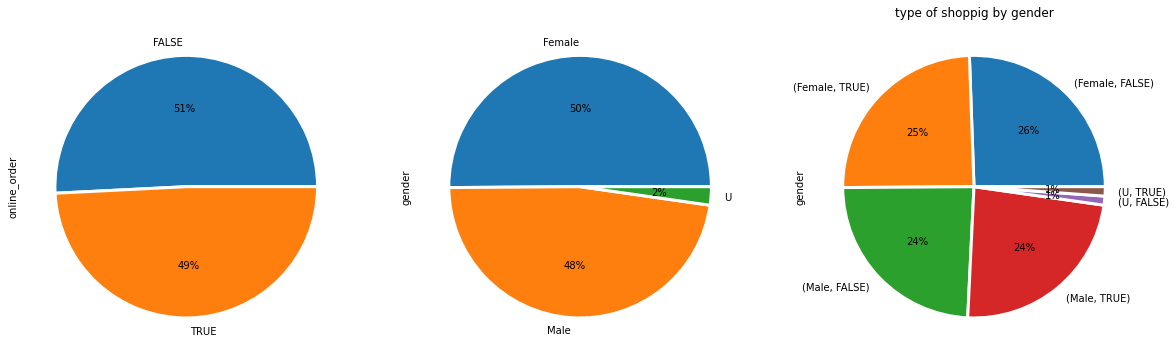

In [831]:
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,7))

# Label distance: gives the space between labels and the center of the pie
online.plot.pie(autopct='%1.0f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },ax=axes[0])
plt.title('online')

gen.plot.pie(autopct='%1.0f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },ax=axes[1])
plt.title('gender')

gen2.plot.pie(autopct='%1.0f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },ax=axes[2])
plt.title('type of shoppig by gender')

#.plot(kind='bar', rot=90, ax=axes[2])

plt.show()

We can see that this dataset is very equilibrated: half transaction online, the genders are fairly fifty-fifty male/female and the same for the splitting in transaction done.

In [832]:
stat = df.groupby(['state'])['state'].count()
car = df.groupby(['state', 'owns_car'])['state'].count()
statpos = pd.crosstab([df.state, df.owns_car],[df.job_industry_category])

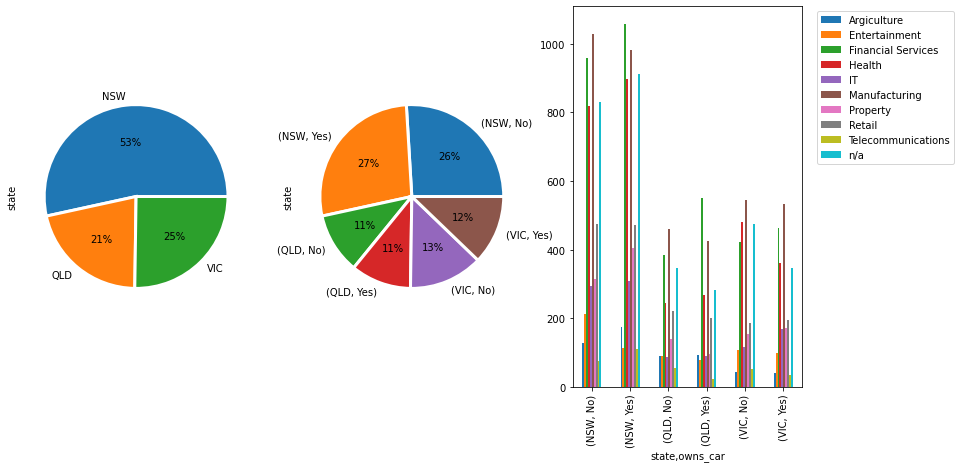

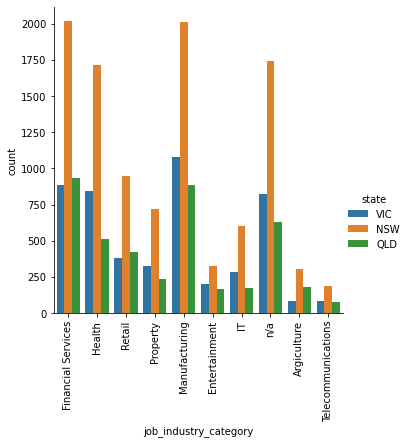

In [833]:
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,7))

# Label distance: gives the space between labels and the center of the pie
g1 = stat.plot.pie(autopct='%1.0f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },ax=axes[0])
g2 = car.plot.pie(autopct='%1.0f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },ax=axes[1])
g5 = statpos.plot(kind='bar', rot=90, ax=axes[2])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
sns.catplot(data=df, kind='count', x ='job_industry_category', hue='state')
plt.xticks(rotation=90)


plt.show()

Costumers are mainly from New South Wales (53%) and work in Financial Services, Health, Manufacturing , or undisclosed. These four groups are also the ones who mainly owns cars, that it is around a 27% of the NSW population. Although we can found non-car owers in these four categories since they make up the other 26% of the population. From Victoria and Queensland we have the other half, 25% and 21% respectively. We notice that percentages of car owner vs non car ownes and their workplace are on the same proportions that the ones in NSW.

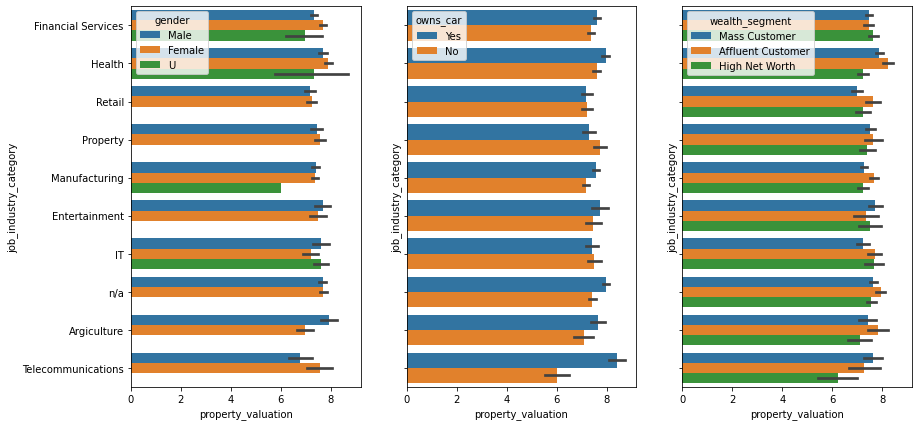

In [885]:
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,7), sharex=True, sharey=True)
p1 = sns.barplot(data=df, x='property_valuation', y = 'job_industry_category', hue='gender', ax=axes[0])
p2 = sns.barplot(data=df, x='property_valuation', y = 'job_industry_category', hue='owns_car', ax=axes[1])
p2 = sns.barplot(data=df, x='property_valuation', y = 'job_industry_category', hue='wealth_segment', ax=axes[2])
plt.show()

The figure above ilustrates the graded monetary value of the customer (it is graded from 1 to 12, being 12 the largest value) on their gender and on if they own a car or not.

We can see that strangely this dataset women have slighter higher values than men, only in agriculture women have less monetary value. And also the same it applies if they have a car they have more value. And, since they have a relative high property value we can see that they tend to spend quite in the shop.


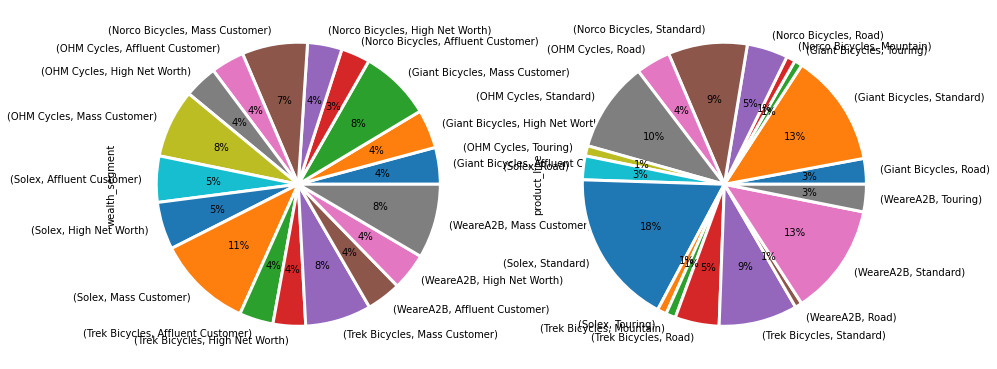

In [898]:
brand = df.groupby(['brand', 'wealth_segment'])['wealth_segment'].count()
brand2 = df.groupby(['brand', 'product_line'])['product_line'].count()

f, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

brand.plot.pie(autopct='%1.0f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, ax=axes[0])
brand2.plot.pie(autopct='%1.0f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, ax=axes[1])

plt.show()

The most bought bike it is the Solex by mass costumers, while the second is WeareA2B, OHM and Giant Bicycle, the less ones are and Norco. All them the most brought type it is the standard bike, and are the most popular, they are all buy it by mass customers. The less popular are the mountain bikes and they are brought it mainly for high net worth customers (i.e., customers that tend to spend a lot).

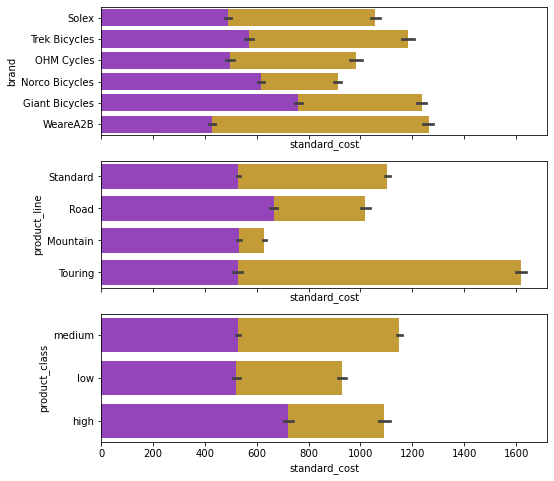

In [883]:
# see how many people buys more expensive bikes, then show me the real price
f, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,8), sharex=True)
p1 = sns.barplot(data=df, x='list_price', y = 'brand', color='goldenrod', ax=axes[0])
p2 = sns.barplot(data=df, x='standard_cost', y = 'brand', color='darkorchid', ax=axes[0])

s1 = sns.barplot(data=df, x='list_price', y='product_line', color='goldenrod', ax=axes[1])
s2 = sns.barplot(data=df, x='standard_cost', y = 'product_line', color='darkorchid', ax=axes[1])

s1 = sns.barplot(data=df, x='list_price', y='product_class', color='goldenrod', ax=axes[2])
s2 = sns.barplot(data=df, x='standard_cost', y = 'product_class', color='darkorchid', ax=axes[2])

plt.show()

In the figure above we can see the profit the shop takes from each sale, depending if it is by brand, type of bike or quality on the product. In golden is the price of the shop in purple the price from factory.

On the top panel, the bikes most expensive are the WeareA2B while the ones with less profit and less pricey are the Norco bikes. From factory the most expensive are the Giant and Norco, while WeareA2B are the cheaper ones.

The middle panel shows us that road bikes are the most expensive and the other three types are pretty similar in price, from factory. In the shop, touring and standard have higher prices. Less profit and less pricey are the mountain bikes.

The bottom panel, shows that from factory the medium and lower quality bikes have similar price and the high ones have higher price, but in store, medium has higher prices than high quality, and lower is the cheapest ones.

We can see that the ones the shop makes more profit are the WeareA2B, Touring bikes with medium quality. 

In [837]:
df.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'transaction_id',
       'product_id', 'transaction_date', 'online_order', 'order_status',
       'brand', 'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'age'],
      dtype='object')

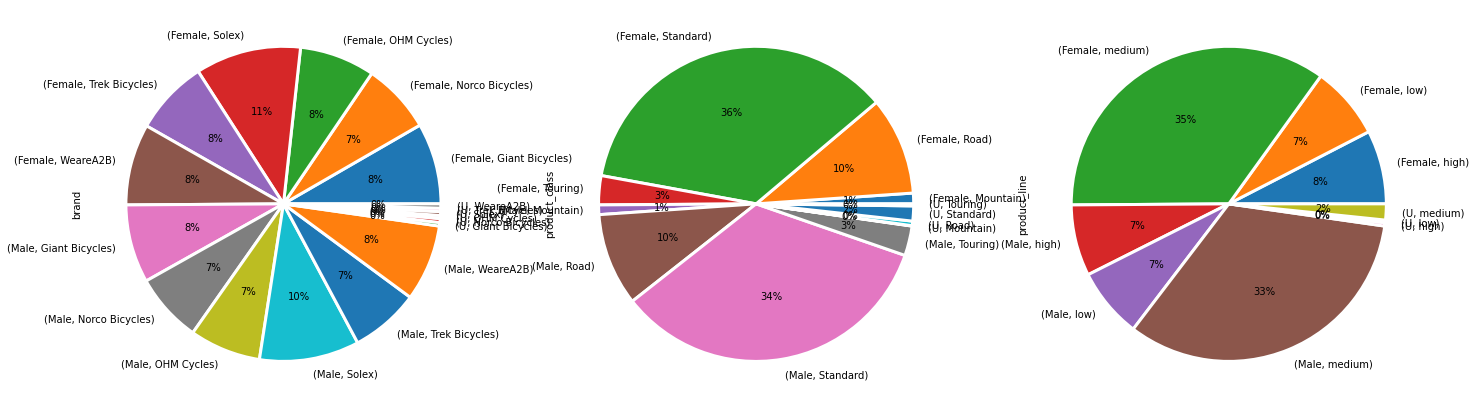

In [910]:
# which type of costumer buys each brand/line/class of bike
#1. gender based
gen1 = df.groupby(['gender', 'brand'])['brand'].count()
gen2 = df.groupby(['gender', 'product_line'])['product_class'].count()
gen3 = df.groupby(['gender', 'product_class'])['product_line'].count()

f, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,10))

gen1.plot.pie(autopct='%1.0f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, ax=axes[0])
gen2.plot.pie(autopct='%1.0f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, ax=axes[1])
gen3.plot.pie(autopct='%1.0f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, ax=axes[2])

plt.show()

We can see that the more sold bike to makes and females, and undefined, are the standard bikes, medium quality and the brand Solex. In the second pie, we also can see that while males buy moutain bikes, females don't. In the third pie, we can also see that women is 1% more likely to buy a high quality bike against males.

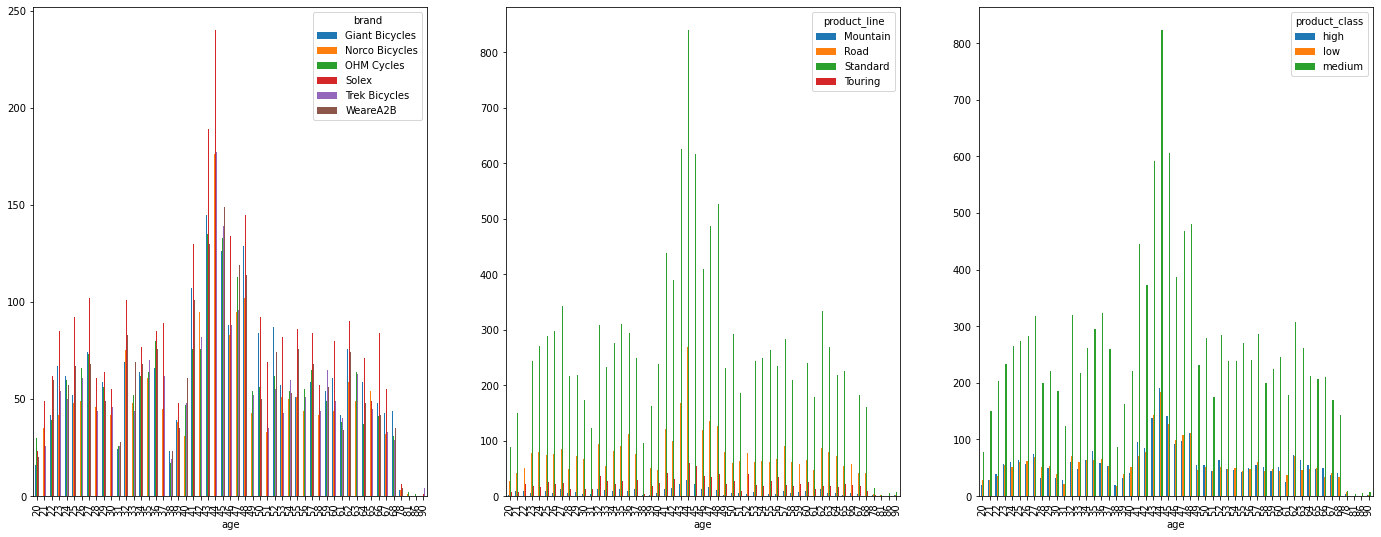

In [949]:
# which type of costumer buys each brand/line/class of bike
#2. age based
gen1 = pd.crosstab(df.age, df.brand)
gen2 = pd.crosstab(df.age, df.product_line)
gen3 = pd.crosstab(df.age, df.product_class)

f, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,9))

g1 = gen1.plot(kind='bar', rot=90, ax=axes[0])
#plt.xticks(range(min(df.age), (max(df.age)+1), 10))

g2 = gen2.plot(kind='bar', rot=90, ax=axes[1])
#plt.xticks(range(min(df.age), (max(df.age)+1), 10))
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

g3 = gen3.plot(kind='bar', rot=90, ax=axes[2])
#plt.xticks(range(min(df.age), (max(df.age)+1), 10))

plt.show()

These three graphs show that the most likely customer is around 40 years old and, as we have seen in the pies, the most sold bikes are the Solex Standard ones. Also, they tend to sell more medium quality products over low or even high.

In summary, the main customer of this shop it is from New South Wales, can be either female or male but has around 40 to 50 years old, has a good income, since they properties are valuated in a mean of 8/12, that is quite high, and it is probable they have a car. Also we know that for the prices of the bikes that they are middle-high class (society). They work either on Finacial services, manafacturing, or in Health. This customer it is usually what they call a "mass customer", they are regular customers that had done many purchases the last three years. 

The cut the shop gets to sale this bikes is quite high, also, we know that the shop tends to sell with higher prices medium quality bikes, which is the product with more sells and pretty popular in all ages and genders. The bike most sold is a Solex standard. The least sold (more likely to male divorciees that like to pretend they still are alive => remember this is a shop for middle agers) are the mountain bikes.

> I would like to point to the shopkeepers that the prices of these bikes are all above market prices and they sell middle quality bikes at high price, it is more likely it to be a shop run by scammers than actual shopkeepers!
> If I am not very out, last I checked the price of high quality bikes were the ones similar to the bar graph that have purple/gold bars, but of course, the purple bars!